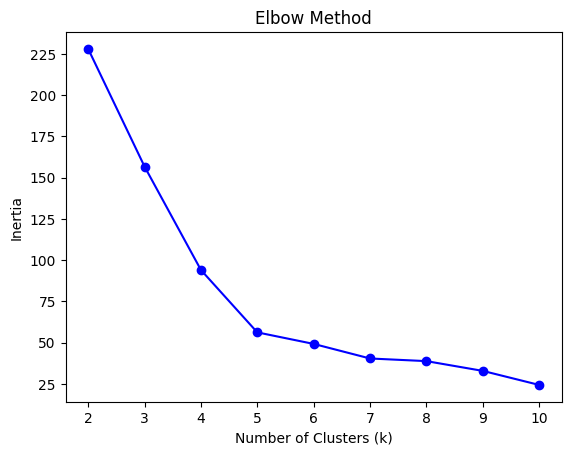

Silhouette Score (Train): 0.5509842461121202
Silhouette Score (Test): 0.566618490320996


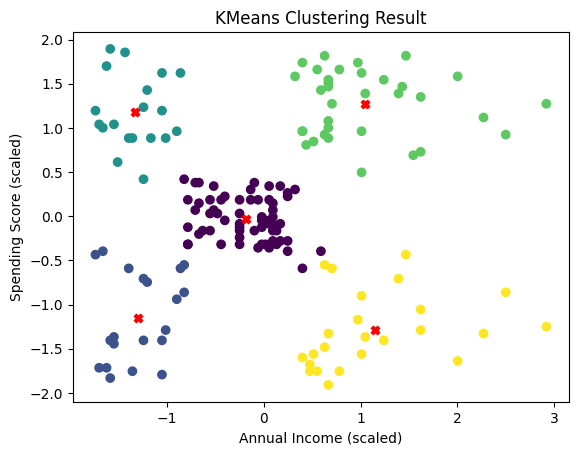

KeyError: 'cluster'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기 및 Annual Income (k$), Spending Score 열 사용
df = pd.read_csv('20250620_143916_mall_customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 2. StandardScaler로 표준화 및 클러스터 레이블을 추가
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=['Annual Income (scaled)', 'Spending Score (scaled)'])
df['Cluster'] = kmeans.predict(X_scaled)

# 3. 학습/테스트 데이터 분리 (8:2)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# 4. 최적 k 결정 (엘보우 기법)
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 5. 최적 k로 KMeans 학습 후 테스트 데이터(X_train)에 적용
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
kmeans.fit(X_train)

# 6. Silhouette Score 평가 및 출력
train_score = silhouette_score(X_train, kmeans.labels_)
test_labels = kmeans.predict(X_test)
test_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score (Train): {train_score}")
print(f"Silhouette Score (Test): {test_score}")

# 7. 학습/테스트 결과 산점도 시각화
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('KMeans Clustering Result')
plt.show()

# 8. 각 클러스터 특징 분석 
cluster_summary = df.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)
